In [12]:
%matplotlib inline
import numpy as np
import pandas as pd

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full_data = [train, test]

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [14]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [15]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
for dataset in full_data:
    #print(dataset.info())
    
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()

    age_null_random_list = np.random.randint(age_avg-age_std, age_avg+age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

train['CategoricalAge'] = pd.cut(train['Age'], 5)

print(train[['CategoricalAge', 'Survived']].groupby('CategoricalAge').mean())

                Survived
CategoricalAge          
(-0.08, 16]     0.526786
(16, 32]        0.349558
(32, 48]        0.380567
(48, 64]        0.434783
(64, 80]        0.090909


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
    
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print(train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare']).mean())

                 Survived
CategoricalFare          
[0, 7.91]        0.197309
(7.91, 14.454]   0.303571
(14.454, 31]     0.454955
(31, 512.329]    0.581081


In [18]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [19]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].fillna(np.random.choice([0, 1]))

train['Sex']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, dtype: object

In [20]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1,}).astype(int)    

In [21]:
for dataset in full_data:
#     dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4
    
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(drop_elements, axis=1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis=1)
test = test.drop(drop_elements, axis=1)

train = train.values
test = test.values

print(train)

[[0 3 0 1 0 0]
 [1 1 1 2 3 1]
 [1 3 1 1 1 0]
 ...
 [0 3 1 1 2 0]
 [1 1 0 1 2 1]
 [0 3 0 1 0 2]]


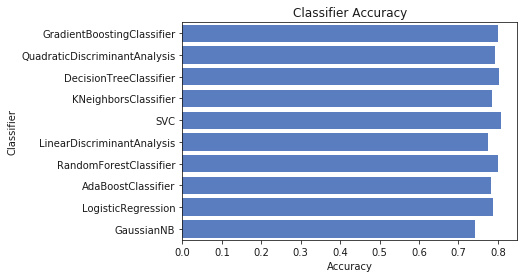

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss

import matplotlib.pyplot as plt
import seaborn as sns

classifiers = [LogisticRegression(),
              KNeighborsClassifier(3),
              SVC(probability=True),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              GradientBoostingClassifier(),
              GaussianNB(),
              LinearDiscriminantAnalysis(),
              QuadraticDiscriminantAnalysis()]

log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns=log_cols)
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
X = train[0::, 1::]
y = train[0::, 0]


acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        try:
            name = clf.__class__.__name__
            clf.fit(X_train, y_train)
            train_predictions = clf.predict(X_test)
            acc = accuracy_score(y_test, train_predictions)
            if name in acc_dict:
                acc_dict[name] += acc
            else:
                acc_dict[name] = acc
        except:
            pass

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
